In [27]:
import numpy as np
import cv2
import numpy as np
import os

import re

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

import keras

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix
 
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.compat.v1.reset_default_graph()

In [4]:

IMG_SIZE = 32
train_ds = tf.keras.utils.image_dataset_from_directory(os.path.join(os.getcwd(), 'entrenamiento'),seed =123,image_size=(IMG_SIZE,IMG_SIZE))
classes_train = train_ds.class_names
nClasses_train = len(classes_train)


Found 1633 files belonging to 8 classes.


In [28]:
#Leer imagenes
def read_images(dirname):
    imgpath = dirname + os.sep
    images = []
    directories = []
    dircount = []
    prevRoot=''
    cant=0
    print("leyendo imagenes de ",imgpath)

    for root, dirnames, filenames in os.walk(imgpath):
        for filename in filenames:
            if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
                cant+=1
                filepath = os.path.join(root, filename)
                # image = plt.imread(filepath)
                image = cv2.imread(filepath)
                plt.imshow(image)
                image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                images.append(image)
                if prevRoot !=root:
                    prevRoot=root
                    directories.append(root)
                    dircount.append(cant)
                    cant=0
    dircount.append(cant)

    dircount = dircount[1:]
    dircount[0]=dircount[0]+1
    print('Directorios leidos:',len(directories))
    print("Imagenes en cada directorio", dircount)
    print('Suma Total de imagenes en subdirs:',sum(dircount))
    
    tipos=[]
    indice=0
    for directorio in directories:
        name = directorio.split(os.sep)
        print(indice , name[len(name)-1])
        tipos.append(name[len(name)-1])
        indice=indice+1

    labels=[]
    indice=0
    for cantidad in dircount:
        for i in range(cantidad):
            labels.append(tipos[indice])
        indice=indice+1

    X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
    y = np.array(labels)
    return X, y


leyendo imagenes de  C:\Users\juana\Downloads\practica3\entrenamiento\
Directorios leidos: 7
Imagenes en cada directorio [63, 213, 105, 949, 37, 204, 62]
Suma Total de imagenes en subdirs: 1633
0 CLASS_02
1 CLASS_03
2 CLASS_04
3 CLASS_05
4 CLASS_06
5 CLASS_07
6 CLASS_08
leyendo imagenes de  C:\Users\juana\Downloads\practica3\test\
Directorios leidos: 8
Imagenes en cada directorio [2, 48, 97, 45, 459, 19, 114, 26]
Suma Total de imagenes en subdirs: 810
0 CLASS_01
1 CLASS_02
2 CLASS_03
3 CLASS_04
4 CLASS_05
5 CLASS_06
6 CLASS_07
7 CLASS_08


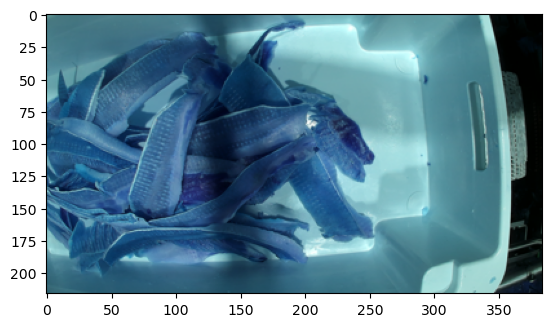

In [29]:
X_train,y_train = read_images(os.path.join(os.getcwd(), 'entrenamiento'))
X_test,y_test = read_images(os.path.join(os.getcwd(), 'test'))

In [18]:
epochs = 40
batch_size = 75

classifier_model = Sequential([
    tf.keras.layers.Rescaling(1./255,input_shape = (IMG_SIZE,IMG_SIZE,3)),
    Conv2D(16,3,activation='relu',padding='same'),
    MaxPooling2D(),
    Conv2D(32,3,activation='relu',padding='same'),
    MaxPooling2D(),
    Conv2D(64,3,activation='relu',padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dense(nClasses_train)
])
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
classifier_model.compile(optimizer=optimizer, 
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=["accuracy"])

In [19]:


classifier_train = classifier_model.fit(train_ds,batch_size=batch_size,epochs=epochs)



Epoch 1/40
52/52 [==============================] - 2s 17ms/step - loss: 1.3774 - accuracy: 0.5732
Epoch 2/40
52/52 [==============================] - 1s 18ms/step - loss: 1.0379 - accuracy: 0.6546
Epoch 3/40
52/52 [==============================] - 1s 18ms/step - loss: 0.7666 - accuracy: 0.7189
Epoch 4/40
52/52 [==============================] - 1s 19ms/step - loss: 0.6085 - accuracy: 0.7740
Epoch 5/40
52/52 [==============================] - 1s 18ms/step - loss: 0.5692 - accuracy: 0.7844
Epoch 6/40
52/52 [==============================] - 1s 18ms/step - loss: 0.5334 - accuracy: 0.7955
Epoch 7/40
52/52 [==============================] - 1s 14ms/step - loss: 0.4408 - accuracy: 0.8328
Epoch 8/40
52/52 [==============================] - 1s 16ms/step - loss: 0.3821 - accuracy: 0.8506
Epoch 9/40
52/52 [==============================] - 1s 13ms/step - loss: 0.3937 - accuracy: 0.8512
Epoch 10/40
52/52 [==============================] - 1s 17ms/step - loss: 0.3716 - accuracy: 0.8555
Epoch 11/

In [20]:
datagen = ImageDataGenerator()
test_generator = datagen.flow_from_directory(os.path.join(os.getcwd(), 'test'),
                                            target_size = (IMG_SIZE,IMG_SIZE),class_mode = 'categorical',shuffle=False)



predicted_test = classifier_model.predict(test_generator)

y_predict_test = np.argmax(predicted_test,axis=1)
y_real_test = test_generator.classes
correct_test = np.where(y_predict_test==y_real_test)[0]


print ('Valores de test correctos %s de %s'%(len(correct_test),len(y_real_test)))
print ('Porcentaje correcto %.2f'%(len(correct_test)/len(y_real_test)*100))
print ('Matriz de confusion ')
confusion_matrix(y_real_test, y_predict_test)

Found 810 images belonging to 8 classes.
26/26 [==============================] - 3s 102ms/step
Valores de test correctos 722 de 810
Porcentaje correcto 89.14
Matriz de confusion 


array([[  0,   0,   0,   0,   0,   0,   1,   0],
       [  0,  36,   0,   9,   0,   0,   3,   0],
       [  0,   0,  74,   0,   1,   0,  22,   0],
       [  0,   2,   1,  41,   0,   0,   1,   0],
       [  0,   1,   9,   0, 439,   0,   5,   5],
       [  0,   0,   0,   0,   4,  15,   0,   0],
       [  0,   0,  10,   2,   1,   0, 101,   0],
       [  0,   0,   1,   0,  10,   0,   0,  16]], dtype=int64)

In [30]:
train_generator = datagen.flow_from_directory(os.path.join(os.getcwd(), 'entrenamiento'),
                                            target_size = (IMG_SIZE,IMG_SIZE),class_mode = 'categorical',shuffle=False)

predicted_train = classifier_model.predict(train_generator)
y_predict_train = np.argmax(predicted_train,axis=1)
y_real_train = train_generator.classes
correct_train = np.where(y_predict_train==y_real_train)[0]

print ('Porcentaje correcto %.2f'%(len(correct_train)/len(y_real_train)*100))
print ('Valores de test correctos %s from %s'%(len(correct_train),len(y_real_train)))
print ('Matriz de confusion ')
confusion_matrix(y_real_train, y_predict_train)

Found 1633 images belonging to 8 classes.
52/52 [==============================] - 6s 103ms/step
Porcentaje correcto 97.98
Valores de test correctos 1600 from 1633
Matriz de confusion 


array([[ 59,   0,   3,   0,   0,   0,   0],
       [  0, 200,   0,   0,   0,  13,   0],
       [  0,   0, 105,   0,   0,   0,   0],
       [  0,   7,   0, 938,   0,   3,   1],
       [  0,   0,   0,   1,  36,   0,   0],
       [  0,   0,   0,   0,   0, 204,   0],
       [  0,   0,   0,   5,   0,   0,  58]], dtype=int64)